In [2]:
print("Thank you");

Thank you


In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os
print("Current dir",os.getcwd())
curr_dir=os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","Valid")
print(train_path)


Current dir d:\tech\Potato-Disease-Project
d:\tech\Potato-Disease-Project\datasets\Train


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [9]:
testing_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
validation_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

C:\Users\91790\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),
    loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=12)

Epoch 1/12


29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3535 - loss: 1.3645 - val_accuracy: 0.5067 - val_loss: 0.9533
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5692 - loss: 0.8665 - val_accuracy: 0.7267 - val_loss: 0.5413
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7794 - loss: 0.4790 - val_accuracy: 0.8533 - val_loss: 0.3225
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8595 - loss: 0.3269 - val_accuracy: 0.8900 - val_loss: 0.2877
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9065 - loss: 0.2488 - val_accuracy: 0.6933 - val_loss: 1.2450
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7869 - loss: 0.5693 - val_accuracy: 0.8967 - val_loss: 0.2629
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8790 - loss: 0.2947 - val_accuracy: 0.8800 - val_loss: 0.3108
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8921 - loss: 0.2977 - val_accuracy: 0.9100 - val_loss: 0.2380
Epo

In [16]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.9809 - loss: 0.0457
Training accuracy: 0.9833333492279053


In [17]:
val_loss, val_acc =cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.9484 - loss: 0.1129
Validation accuracy: 0.949999988079071


In [18]:
cnn.save('trained_plant_disease_model.keras')

In [19]:
training_history.history

{'accuracy': [0.425555557012558,
  0.6211110949516296,
  0.7988888621330261,
  0.8744444251060486,
  0.9211111068725586,
  0.852222204208374,
  0.9100000262260437,
  0.9188888669013977,
  0.9577777981758118,
  0.9666666388511658,
  0.9633333086967468,
  0.9822221994400024],
 'loss': [1.1492260694503784,
  0.7728919982910156,
  0.44498878717422485,
  0.3082456588745117,
  0.22069382667541504,
  0.3635998070240021,
  0.24002018570899963,
  0.2284388542175293,
  0.13889355957508087,
  0.07819164544343948,
  0.08928419649600983,
  0.05292180925607681],
 'val_accuracy': [0.5066666603088379,
  0.7266666889190674,
  0.8533333539962769,
  0.8899999856948853,
  0.6933333277702332,
  0.8966666460037231,
  0.8799999952316284,
  0.9100000262260437,
  0.9433333277702332,
  0.9166666865348816,
  0.9200000166893005,
  0.949999988079071],
 'val_loss': [0.9533222317695618,
  0.5413001179695129,
  0.3224729895591736,
  0.28774046897888184,
  1.2449939250946045,
  0.26286712288856506,
  0.310769945383071

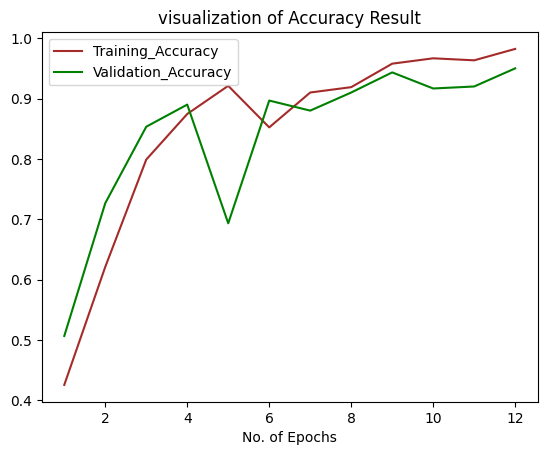

In [21]:
epochs = [i for i in range(1,13)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training_Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation_Accuracy')
plt.xlabel('No. of Epochs')
plt.title('visualization of Accuracy Result')
plt.legend()
plt.show()